<a href="https://colab.research.google.com/github/codegitfirst/ML-workshop/blob/main/cradit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
!pip install scikit-learn matplotlib seaborn numpy pandas

In [3]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13747 entries, 0 to 13746
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              13747 non-null  float64
 1   distance_from_last_transaction  13746 non-null  float64
 2   ratio_to_median_purchase_price  13746 non-null  float64
 3   repeat_retailer                 13746 non-null  float64
 4   used_chip                       13746 non-null  float64
 5   used_pin_number                 13746 non-null  float64
 6   online_order                    13746 non-null  float64
 7   fraud                           13746 non-null  float64
dtypes: float64(8)
memory usage: 859.3 KB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,13747.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000,13746.000000
mean,26.989010,4.911782,1.811992,0.880183,0.354139,0.102866,0.644406,0.084825
std,64.916557,20.968387,2.715292,0.324759,0.478269,0.303795,0.478710,0.278631
min,0.049270,0.000856,0.011373,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.816439,0.307066,0.482429,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.060976,1.014374,0.999819,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26.068616,3.409086,2.064749,1.000000,1.000000,0.000000,1.000000,0.000000
max,2353.226927,990.070315,65.150879,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    1
ratio_to_median_purchase_price    1
repeat_retailer                   1
used_chip                         1
used_pin_number                   1
online_order                      1
fraud                             1
dtype: int64

In [7]:
df['fraud'].value_counts()

fraud
0.0    12580
1.0     1166
Name: count, dtype: int64

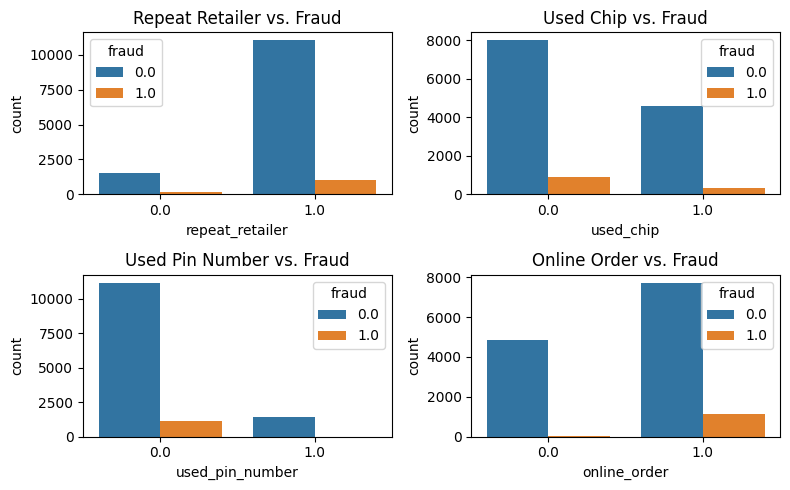

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a 2x2 grid of countplots
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# Plot 1: repeat_retailer vs. fraud
sns.countplot(data=df, x='repeat_retailer', hue='fraud', ax=axes[0, 0])

# Plot 2: used_chip vs. fraud
sns.countplot(data=df, x='used_chip', hue='fraud', ax=axes[0, 1])

# Plot 3: used_pin_number vs. fraud
sns.countplot(data=df, x='used_pin_number', hue='fraud', ax=axes[1, 0])

# Plot 4: online_order vs. fraud
sns.countplot(data=df, x='online_order', hue='fraud', ax=axes[1, 1])

# Set titles for each plot
axes[0, 0].set_title('Repeat Retailer vs. Fraud')
axes[0, 1].set_title('Used Chip vs. Fraud')
axes[1, 0].set_title('Used Pin Number vs. Fraud')
axes[1, 1].set_title('Online Order vs. Fraud')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


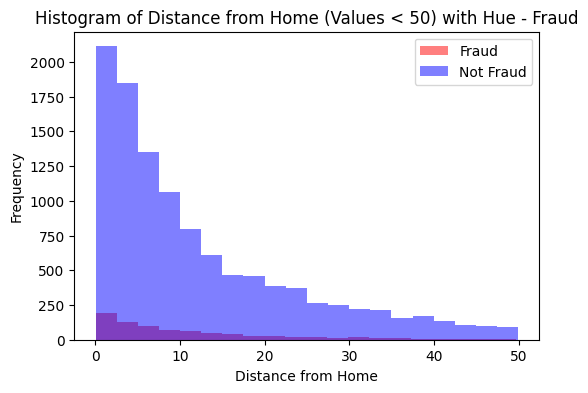

In [9]:
import matplotlib.pyplot as plt


# Filter data by fraud category and values less than 500
fraud_data = df[(df['fraud'] == 1) & (df['distance_from_home'] < 50)]['distance_from_home']
not_fraud_data = df[(df['fraud'] == 0) & (df['distance_from_home'] < 50)]['distance_from_home']

# Create a figure with a specified size
plt.figure(figsize=(6, 4))

# Create a histogram
plt.hist(fraud_data, bins=20, alpha=0.5, color='red', label='Fraud')
plt.hist(not_fraud_data, bins=20, alpha=0.5, color='blue', label='Not Fraud')

plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Histogram of Distance from Home (Values < 50) with Hue - Fraud')
plt.legend()

# Show the histogram
plt.show()



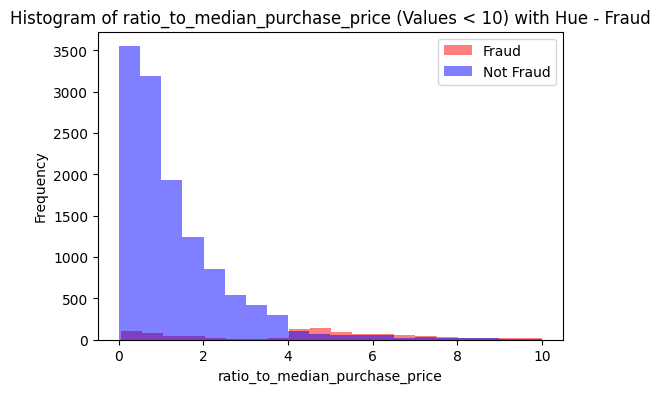

In [11]:
import matplotlib.pyplot as plt

# Filter data by fraud category and values less than 500
fraud_data = df[(df['fraud'] == 1) & (df['ratio_to_median_purchase_price'] < 10)]['ratio_to_median_purchase_price']
not_fraud_data = df[(df['fraud'] == 0) & (df['ratio_to_median_purchase_price'] < 10)]['ratio_to_median_purchase_price']

# Create a figure with a specified size
plt.figure(figsize=(6, 4))

# Create a histogram
plt.hist(fraud_data, bins=20, alpha=0.5, color='red', label='Fraud')
plt.hist(not_fraud_data, bins=20, alpha=0.5, color='blue', label='Not Fraud')

plt.xlabel('ratio_to_median_purchase_price')
plt.ylabel('Frequency')
plt.title('Histogram of ratio_to_median_purchase_price (Values < 10) with Hue - Fraud')
plt.legend()

# Show the histogram
plt.show()

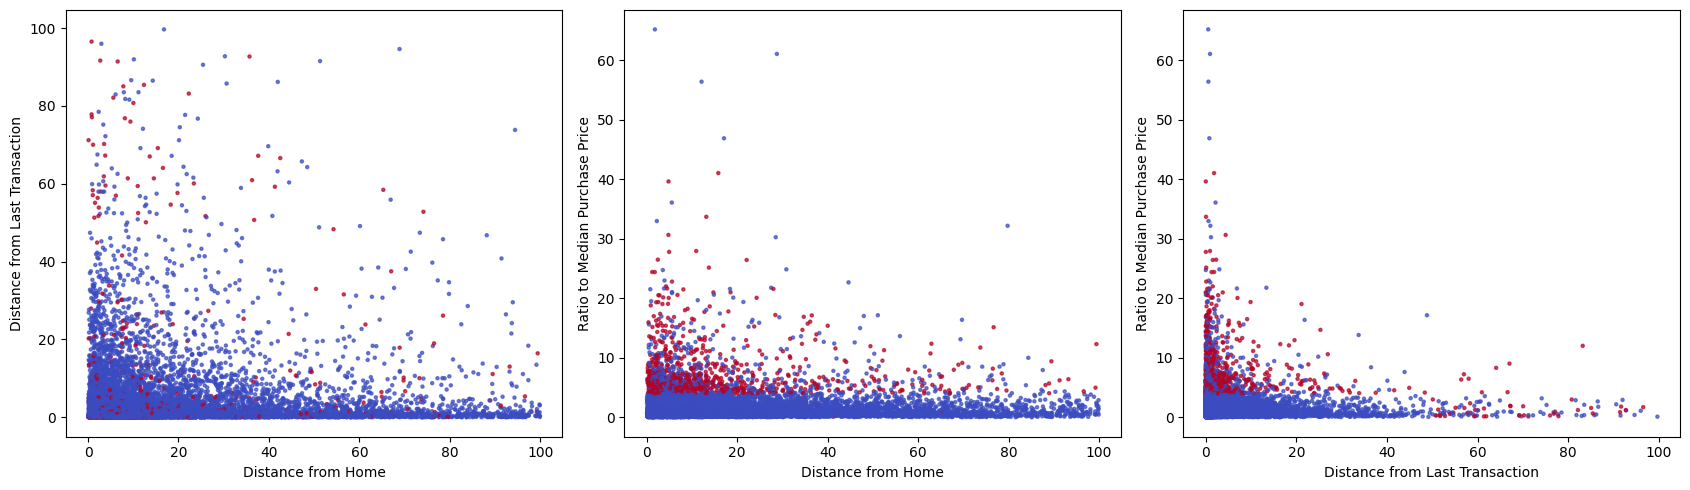

In [12]:
import matplotlib.pyplot as plt


# Filter data to include only values less than 30 for all three columns
filtered_data = df[(df['distance_from_home'] < 100) & (df['distance_from_last_transaction'] < 100) & (df['ratio_to_median_purchase_price'] < 100)]

# Create a 1x3 grid of scatterplots
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# Scatterplot 1: distance_from_home vs. distance_from_last_transaction
axes[0].scatter(filtered_data['distance_from_home'], filtered_data['distance_from_last_transaction'], c=filtered_data['fraud'], cmap='coolwarm', alpha=0.7, s=5)
axes[0].set_xlabel('Distance from Home')
axes[0].set_ylabel('Distance from Last Transaction')
#axes[0].set_title('Distance from Home vs. Distance from Last Transaction')

# Scatterplot 2: distance_from_home vs. ratio_to_median_purchase_price
axes[1].scatter(filtered_data['distance_from_home'], filtered_data['ratio_to_median_purchase_price'], c=filtered_data['fraud'], cmap='coolwarm', alpha=0.7, s=5)
axes[1].set_xlabel('Distance from Home')
axes[1].set_ylabel('Ratio to Median Purchase Price')
#axes[1].set_title('Distance from Home vs. Ratio to Median Purchase Price')

# Scatterplot 3: distance_from_last_transaction vs. ratio_to_median_purchase_price
axes[2].scatter(filtered_data['distance_from_last_transaction'], filtered_data['ratio_to_median_purchase_price'], c=filtered_data['fraud'], cmap='coolwarm', alpha=0.7, s=5)
axes[2].set_xlabel('Distance from Last Transaction')
axes[2].set_ylabel('Ratio to Median Purchase Price')
#axes[2].set_title('Distance from Last Transaction vs. Ratio to Median Purchase Price')

# Adjust layout
plt.tight_layout()

# Show the scatterplots
plt.show()


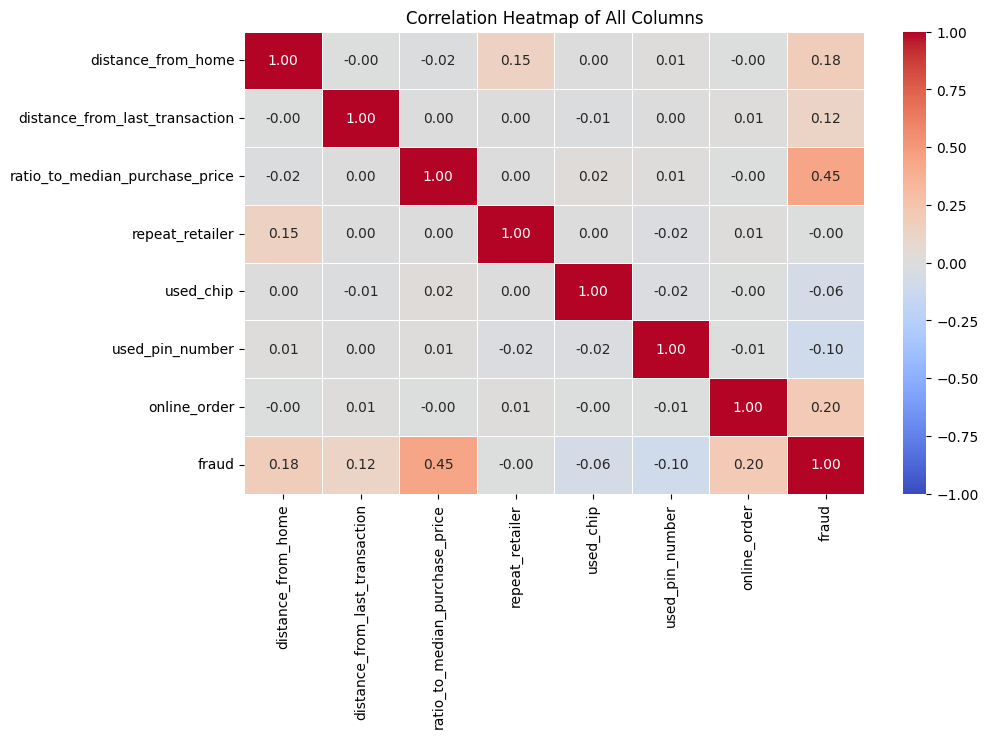

In [13]:

correlation_matrix = df.corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0, linewidths=0.5)

plt.title('Correlation Heatmap of All Columns')
plt.show()


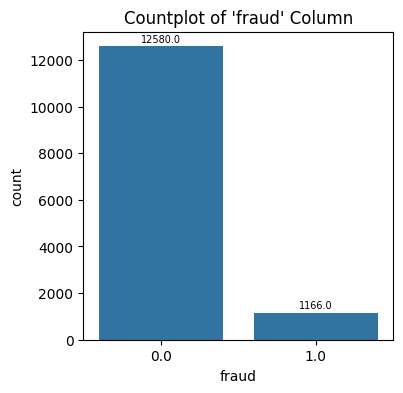

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt



# Create a countplot of the "fraud" column
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=df, x="fraud")

plt.title("Countplot of 'fraud' Column")

# Annotate the bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=7, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

# Split the data into train and test sets with a similar target distribution
X = df.drop('fraud', axis=1)  # Features
y = df['fraud']  # Target

# Handle missing values in the target variable (y)
y = y.fillna(y.mode()[0])  # Fill with the most frequent value

# Handle missing values in the features (X) using imputation
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean of the column
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the training data
evaluate_model(y_train, y_train_pred, 'Training Set') # Call the function to evaluate

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, 'Test Set')

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8806
         1.0       1.00      1.00      1.00       816

    accuracy                           1.00      9622
   macro avg       1.00      1.00      1.00      9622
weighted avg       1.00      1.00      1.00      9622

Confusion Matrix for Training Set:
[[8806    0]
 [   0  816]]

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3775
         1.0       1.00      1.00      1.00       350

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125

Confusion Matrix for Test Set:
[[3775    0]
 [   1  349]]



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model and show classification reports and confusion matrices
def evaluate_model(y_true, y_pred, set_name):
    report = classification_report(y_true, y_pred)
    matrix = confusion_matrix(y_true, y_pred)
    print(f"Classification Report for {set_name}:\n{report}")
    print(f"Confusion Matrix for {set_name}:\n{matrix}\n")

# Evaluate on the training data
evaluate_model(y_train, y_train_pred, "Training Data")

# Evaluate on the test data
evaluate_model(y_test, y_test_pred, "Test Data")


Classification Report for Training Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8806
         1.0       1.00      1.00      1.00       816

    accuracy                           1.00      9622
   macro avg       1.00      1.00      1.00      9622
weighted avg       1.00      1.00      1.00      9622

Confusion Matrix for Training Data:
[[8806    0]
 [   0  816]]

Classification Report for Test Data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3775
         1.0       1.00      0.99      0.99       350

    accuracy                           1.00      4125
   macro avg       1.00      0.99      1.00      4125
weighted avg       1.00      1.00      1.00      4125

Confusion Matrix for Test Data:
[[3775    0]
 [   5  345]]

